In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
weather_df=pd.read_csv('weather_data.csv')

In [54]:
weather_df.shape

(6576, 15)

In [55]:
weather_df.head()

,air_temp,albedo,clearsky_dhi,clearsky_dni,clearsky_ghi,clearsky_gti,cloud_opacity,dhi,dni,ghi,relative_humidity,min_air_temp,max_air_temp,period_end,period
0,17,0.13,68,158,101,164,58.5,42,0,42,86.3,15.8,20.0,2023-04-01T01:00:00+00:00,PT60M
1,18,0.13,148,384,307,545,73.4,78,0,78,80.9,15.8,20.0,2023-04-01T02:00:00+00:00,PT60M
2,19,0.13,208,518,524,746,92.8,37,0,37,79.2,15.8,20.0,2023-04-01T03:00:00+00:00,PT60M
3,18,0.13,263,566,699,826,90.8,64,0,64,90.5,15.8,20.0,2023-04-01T04:00:00+00:00,PT60M
4,18,0.13,284,624,835,885,81.6,156,0,156,97.5,15.8,20.0,2023-04-01T05:00:00+00:00,PT60M


In [56]:
weather_df['period_end'] = pd.to_datetime(weather_df['period_end'])

In [57]:

weather_df['period_end'] = weather_df['period_end'].dt.tz_convert('Asia/Kolkata')
weather_df['period_end'] = weather_df['period_end'] - pd.Timedelta(minutes=30)


# 4. Now, create your merge keys from the *correct* local time
weather_df['date'] = weather_df['period_end'].dt.date
weather_df['month'] = weather_df['period_end'].dt.month
weather_df['time'] = weather_df['period_end'].dt.time


In [58]:
weather_df.drop(['period_end','period'],axis=1,inplace=True)

In [59]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6576 entries, 0 to 6575
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   air_temp           6576 non-null   int64  
 1   albedo             6576 non-null   float64
 2   clearsky_dhi       6576 non-null   int64  
 3   clearsky_dni       6576 non-null   int64  
 4   clearsky_ghi       6576 non-null   int64  
 5   clearsky_gti       6576 non-null   int64  
 6   cloud_opacity      6576 non-null   float64
 7   dhi                6576 non-null   int64  
 8   dni                6576 non-null   int64  
 9   ghi                6576 non-null   int64  
 10  relative_humidity  6576 non-null   float64
 11  min_air_temp       6576 non-null   float64
 12  max_air_temp       6576 non-null   float64
 13  date               6576 non-null   object 
 14  month              6576 non-null   int32  
 15  time               6576 non-null   object 
dtypes: float64(5), int32(1),

In [60]:
weather_df.shape

(6576, 16)

In [61]:
weather_df.head(20)

,air_temp,albedo,clearsky_dhi,clearsky_dni,clearsky_ghi,clearsky_gti,cloud_opacity,dhi,dni,ghi,relative_humidity,min_air_temp,max_air_temp,date,month,time
0,17,0.13,68,158,101,164,58.5,42,0,42,86.3,15.8,20.0,2023-04-01,4,06:00:00
1,18,0.13,148,384,307,545,73.4,78,0,78,80.9,15.8,20.0,2023-04-01,4,07:00:00
2,19,0.13,208,518,524,746,92.8,37,0,37,79.2,15.8,20.0,2023-04-01,4,08:00:00
3,18,0.13,263,566,699,826,90.8,64,0,64,90.5,15.8,20.0,2023-04-01,4,09:00:00
4,18,0.13,284,624,835,885,81.6,156,0,156,97.5,15.8,20.0,2023-04-01,4,10:00:00
5,18,0.13,280,677,913,919,68.4,290,0,290,96.6,15.8,20.0,2023-04-01,4,11:00:00
6,19,0.13,267,696,912,927,44.6,431,79,503,96.6,15.8,20.0,2023-04-01,4,12:00:00
7,19,0.13,243,691,836,916,24.8,489,162,629,93.1,15.8,20.0,2023-04-01,4,13:00:00
8,20,0.13,213,653,691,879,54.0,318,7,323,86.0,15.8,20.0,2023-04-01,4,14:00:00
9,20,0.13,172,579,496,796,82.3,92,0,92,81.5,15.8,20.0,2023-04-01,4,15:00:00


In [62]:
#weather_df.to_csv("weather_data_cleaned.csv",index=False)

## April generation data

In [3]:
combined=pd.read_csv('all_months_hourly_energy.csv')
combined.head()


,timestamp,MWh,Avg_MW,Max_MW
0,2023-04-01 00:00:00,0.0,0.0,0.0
1,2023-04-01 01:00:00,0.0,0.0,0.0
2,2023-04-01 02:00:00,0.0,0.0,0.0
3,2023-04-01 03:00:00,0.0,0.0,0.0
4,2023-04-01 04:00:00,0.0,0.0,0.0


In [4]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6600 entries, 0 to 6599
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  6600 non-null   object 
 1   MWh        6600 non-null   float64
 2   Avg_MW     6552 non-null   float64
 3   Max_MW     6552 non-null   float64
dtypes: float64(3), object(1)
memory usage: 206.4+ KB


In [65]:
combined['timestamp']=pd.to_datetime(combined['timestamp'])


In [66]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6600 entries, 0 to 6599
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  6600 non-null   datetime64[ns]
 1   MWh        6600 non-null   float64       
 2   Avg_MW     6552 non-null   float64       
 3   Max_MW     6552 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 206.4 KB


In [67]:
combined['date']=combined['timestamp'].dt.date
combined['month']=combined['timestamp'].dt.month
combined['time'] = (combined['timestamp']).dt.time

In [68]:
import datetime
filter_date = datetime.date(2023, 4, 2)
combined = combined[combined['date'] >= filter_date]

In [69]:
combined.head()


,timestamp,MWh,Avg_MW,Max_MW,date,month,time
24,2023-04-02 00:00:00,0.0,0.0,0.0,2023-04-02,4,00:00:00
25,2023-04-02 01:00:00,0.0,0.0,0.0,2023-04-02,4,01:00:00
26,2023-04-02 02:00:00,0.0,0.0,0.0,2023-04-02,4,02:00:00
27,2023-04-02 03:00:00,0.0,0.0,0.0,2023-04-02,4,03:00:00
28,2023-04-02 04:00:00,0.0,0.0,0.0,2023-04-02,4,04:00:00


In [70]:
weather_df.head()

,air_temp,albedo,clearsky_dhi,clearsky_dni,clearsky_ghi,clearsky_gti,cloud_opacity,dhi,dni,ghi,relative_humidity,min_air_temp,max_air_temp,date,month,time
0,17,0.13,68,158,101,164,58.5,42,0,42,86.3,15.8,20.0,2023-04-01,4,06:00:00
1,18,0.13,148,384,307,545,73.4,78,0,78,80.9,15.8,20.0,2023-04-01,4,07:00:00
2,19,0.13,208,518,524,746,92.8,37,0,37,79.2,15.8,20.0,2023-04-01,4,08:00:00
3,18,0.13,263,566,699,826,90.8,64,0,64,90.5,15.8,20.0,2023-04-01,4,09:00:00
4,18,0.13,284,624,835,885,81.6,156,0,156,97.5,15.8,20.0,2023-04-01,4,10:00:00


In [71]:
combined.shape

(6576, 7)

In [72]:
weather_df.shape

(6576, 16)

In [73]:
combined.head(10)

,timestamp,MWh,Avg_MW,Max_MW,date,month,time
24,2023-04-02 00:00:00,0.00000,0.00000,0.000,2023-04-02,4,00:00:00
25,2023-04-02 01:00:00,0.00000,0.00000,0.000,2023-04-02,4,01:00:00
26,2023-04-02 02:00:00,0.00000,0.00000,0.000,2023-04-02,4,02:00:00
27,2023-04-02 03:00:00,0.00000,0.00000,0.000,2023-04-02,4,03:00:00
28,2023-04-02 04:00:00,0.00000,0.00000,0.000,2023-04-02,4,04:00:00
29,2023-04-02 05:00:00,0.27800,0.27800,0.762,2023-04-02,4,05:00:00
30,2023-04-02 06:00:00,2.13450,2.13450,4.286,2023-04-02,4,06:00:00
31,2023-04-02 07:00:00,2.41775,2.41775,3.109,2023-04-02,4,07:00:00
32,2023-04-02 08:00:00,5.43350,5.43350,8.272,2023-04-02,4,08:00:00
33,2023-04-02 09:00:00,16.81625,16.81625,17.319,2023-04-02,4,09:00:00


In [231]:
combined.drop(['timestamp'],axis=1,inplace=True)


In [74]:
combined.to_csv("combined_cleaned.csv",index=False)

## Joining weather data and generation data

In [76]:
combined=pd.read_csv('combined_cleaned.csv')
weather=pd.read_csv('weather_data_cleaned.csv')

In [234]:
weather.shape


(696, 16)

In [235]:
combined.shape

(696, 6)

In [77]:
merged=pd.merge(weather,combined,on=['date','month','time'],how='inner')
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6558 entries, 0 to 6557
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   air_temp           6558 non-null   int64  
 1   albedo             6558 non-null   float64
 2   clearsky_dhi       6558 non-null   int64  
 3   clearsky_dni       6558 non-null   int64  
 4   clearsky_ghi       6558 non-null   int64  
 5   clearsky_gti       6558 non-null   int64  
 6   cloud_opacity      6558 non-null   float64
 7   dhi                6558 non-null   int64  
 8   dni                6558 non-null   int64  
 9   ghi                6558 non-null   int64  
 10  relative_humidity  6558 non-null   float64
 11  min_air_temp       6558 non-null   float64
 12  max_air_temp       6558 non-null   float64
 13  date               6558 non-null   object 
 14  month              6558 non-null   int64  
 15  time               6558 non-null   object 
 16  timestamp          6558 

In [78]:
merged.head()

,air_temp,albedo,clearsky_dhi,clearsky_dni,clearsky_ghi,clearsky_gti,cloud_opacity,dhi,dni,ghi,relative_humidity,min_air_temp,max_air_temp,date,month,time,timestamp,MWh,Avg_MW,Max_MW
0,16,0.13,0,0,0,0,23.0,0,0,0,87.9,14.8,25.1,2023-04-02,4,00:00:00,2023-04-02 00:00:00,0.0,0.0,0.0
1,15,0.13,0,0,0,0,13.7,0,0,0,87.9,14.8,25.1,2023-04-02,4,01:00:00,2023-04-02 01:00:00,0.0,0.0,0.0
2,15,0.13,0,0,0,0,17.9,0,0,0,87.0,14.8,25.1,2023-04-02,4,02:00:00,2023-04-02 02:00:00,0.0,0.0,0.0
3,15,0.13,0,0,0,0,27.9,0,0,0,83.4,14.8,25.1,2023-04-02,4,03:00:00,2023-04-02 03:00:00,0.0,0.0,0.0
4,15,0.13,0,0,0,0,26.5,0,0,0,80.1,14.8,25.1,2023-04-02,4,04:00:00,2023-04-02 04:00:00,0.0,0.0,0.0


## EDA
# Feature engineering and Feature Selection

In [79]:
correlation_series = merged.corr(numeric_only=True)['MWh'].sort_values(ascending=False)
print(correlation_series)

MWh                  1.000000
Avg_MW               0.998994
Max_MW               0.983705
ghi                  0.933388
clearsky_ghi         0.857391
clearsky_dni         0.829833
clearsky_gti         0.826177
dni                  0.804911
clearsky_dhi         0.717035
dhi                  0.695938
air_temp             0.449341
max_air_temp         0.106725
month               -0.012404
albedo              -0.025858
min_air_temp        -0.044655
cloud_opacity       -0.473979
relative_humidity   -0.582096
Name: MWh, dtype: float64


<Axes: xlabel='Avg_MW', ylabel='MWh'>

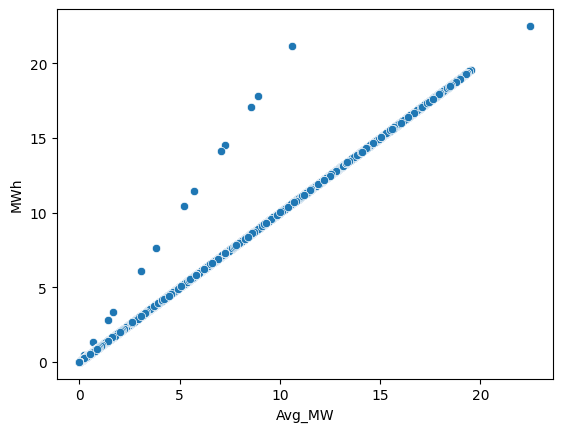

In [80]:
sns.scatterplot(data=merged, x='Avg_MW', y='MWh')

<Axes: xlabel='ghi', ylabel='MWh'>

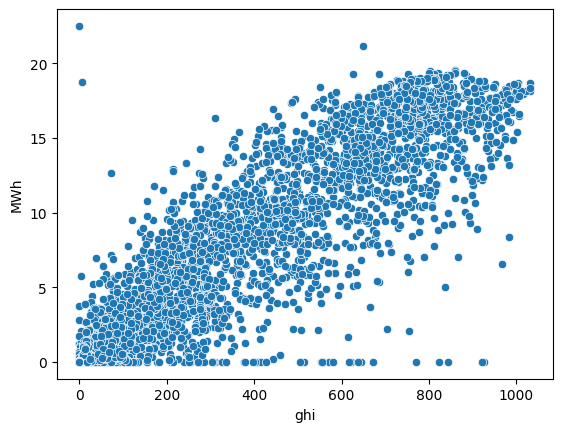

In [81]:
sns.scatterplot(data=merged, x='ghi', y='MWh')

<Axes: xlabel='ghi', ylabel='dni'>

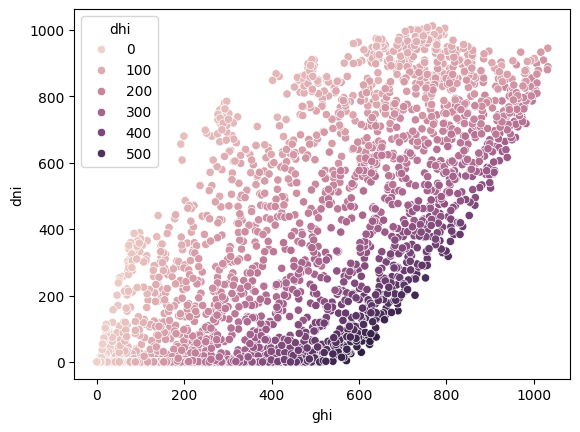

In [82]:
sns.scatterplot(data=merged, x='ghi', y='dni',hue='dhi')

<Axes: xlabel='relative_humidity', ylabel='MWh'>

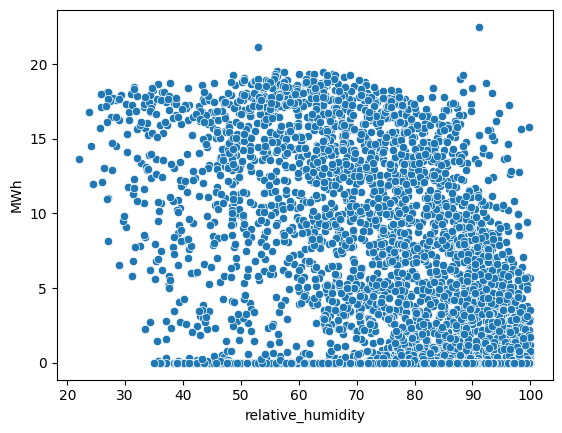

In [83]:
sns.scatterplot(data=merged, x='relative_humidity', y='MWh')

<Axes: xlabel='albedo', ylabel='MWh'>

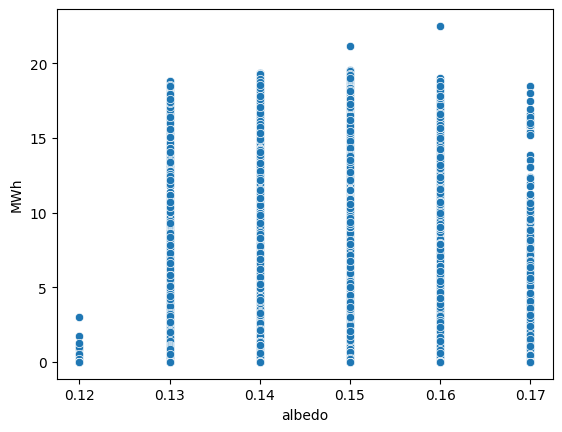

In [84]:
sns.scatterplot(data=merged, x='albedo', y='MWh')

<Axes: xlabel='ghi', ylabel='clearsky_ghi'>

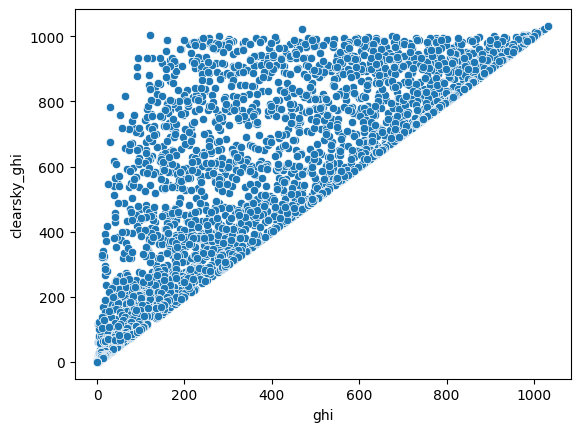

In [85]:
sns.scatterplot(data=merged, x='ghi', y='clearsky_ghi')

In [86]:
columns_to_keep = [
    'MWh',              
    'ghi',
    'dhi',
    'dni',
    'air_temp',
    'cloud_opacity',
    'relative_humidity',
    'date',             
    'time',             
    'month'             
]

# 2. Overwrite 'merged' with a new DataFrame containing ONLY these columns
merged = merged[columns_to_keep]
merged['MWh'] = merged['MWh'].round(4)


In [87]:
merged.head()

,MWh,ghi,dhi,dni,air_temp,cloud_opacity,relative_humidity,date,time,month
0,0.0,0,0,0,16,23.0,87.9,2023-04-02,00:00:00,4
1,0.0,0,0,0,15,13.7,87.9,2023-04-02,01:00:00,4
2,0.0,0,0,0,15,17.9,87.0,2023-04-02,02:00:00,4
3,0.0,0,0,0,15,27.9,83.4,2023-04-02,03:00:00,4
4,0.0,0,0,0,15,26.5,80.1,2023-04-02,04:00:00,4


In [88]:
merged.to_csv('merged.csv',index=False)

 ### 1.Detecting outlier

Text(0, 0.5, 'MWh')

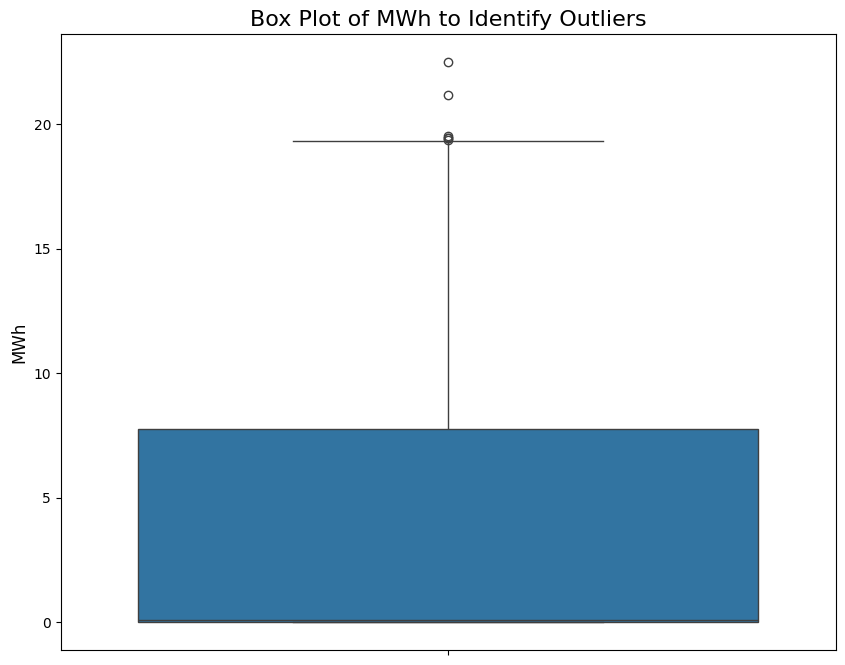

In [89]:
plt.figure(figsize=(10, 8)) # Make the plot nice and tall
sns.boxplot(y=merged['MWh'])
plt.title('Box Plot of MWh to Identify Outliers', fontsize=16)
plt.ylabel('MWh', fontsize=12)

In [90]:
merged['MWh'].describe()

count    6558.000000
mean        4.130625
std         5.883984
min         0.000000
25%         0.000000
50%         0.082150
75%         7.743325
max        22.500000
Name: MWh, dtype: float64

In [91]:
# 1. Calculate the outlier boundary
q1 = merged['MWh'].quantile(0.25)
q3 = merged['MWh'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + (1.5 * iqr)

print(f"The outlier boundary is: {upper_bound:.4f} MWh")

# 2. Find and count the outliers
outliers = merged[merged['MWh'] > upper_bound]
num_outliers = len(outliers)

print(f"You have {num_outliers} outliers out of {len(merged)} total rows.")

The outlier boundary is: 19.3583 MWh
You have 6 outliers out of 6558 total rows.


# Train-Test
## feature scaling

In [92]:
merged.shape

(6558, 10)

In [93]:
X = merged.drop(['MWh', 'date', 'time', 'month'], axis=1)
y=merged['MWh']


In [169]:
X

,ghi,dhi,dni,air_temp,cloud_opacity,relative_humidity
0,0,0,0,16,23.0,87.9
1,0,0,0,15,13.7,87.9
2,0,0,0,15,17.9,87.0
3,0,0,0,15,27.9,83.4
4,0,0,0,15,26.5,80.1
...,...,...,...,...,...,...
6553,0,0,0,11,0.0,94.2
6554,0,0,0,11,14.9,93.8
6555,0,0,0,10,19.7,93.5
6556,0,0,0,10,10.8,93.5


In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2,random_state=42)

In [95]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Model 

In [141]:
from sklearn.linear_model import LinearRegression

In [142]:
lr_model=LinearRegression()
lr_model.fit(X_train_scaled,y_train)
y_pred_lr=lr_model.predict(X_test_scaled)


In [143]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred_lr)
mse=mean_squared_error(y_test,y_pred_lr)
rmse=np.sqrt(mse)

In [144]:
print("\n--- Linear Regression Performance ---")
print(f'R2 Score : {r2:.4f}')
print(f"Mean Absolute Error : {mae:.4f}")
print(f"Root Mean Squared Error : {rmse:.4f} MWh")


--- Linear Regression Performance ---
R2 Score : 0.8862
Mean Absolute Error : 1.1603
Root Mean Squared Error : 1.9791 MWh


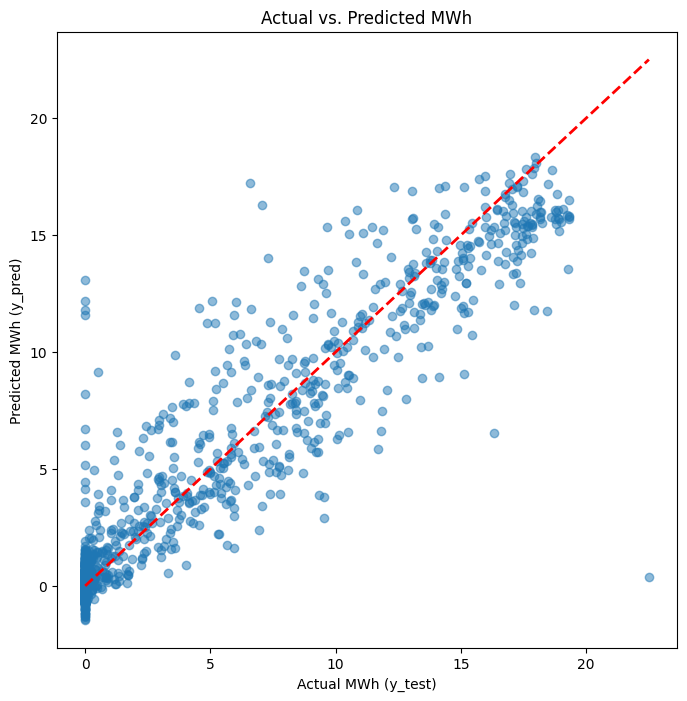

In [145]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Adds a perfect-prediction line
plt.xlabel('Actual MWh (y_test)')
plt.ylabel('Predicted MWh (y_pred)')
plt.title('Actual vs. Predicted MWh')
plt.show()

In [146]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train)
y_pred_dt=dt_model.predict(X_test_scaled)

In [147]:
r2=r2_score(y_test,y_pred_dt)
mae=mean_absolute_error(y_test,y_pred_dt)
mse=mean_squared_error(y_test,y_pred_dt)
rmse=np.sqrt(mse)
print("\n--- Decision Tree Performance ---")
print(f'R2 Score : {r2:.4f}')
print(f"Mean Absolute Error : {mae:.4f}")
print(f"Root Mean Squared Error : {rmse:.4f} MWh")


--- Decision Tree Performance ---
R2 Score : 0.8011
Mean Absolute Error : 1.1833
Root Mean Squared Error : 2.6171 MWh


In [148]:
from sklearn.ensemble import RandomForestRegressor

rf_model=RandomForestRegressor(random_state=4|2)
rf_model.fit(X_train_scaled,y_train)
y_pred_rf=rf_model.predict(X_test_scaled)

In [149]:
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred_rf)
mse=mean_squared_error(y_test,y_pred_rf)
rmse=np.sqrt(mse)
print("\n--- Random Forest Performance ---")
print(f'R2 Score : {r2:.4f}')
print(f"Mean Absolute Error : {mae:.4f}")
print(f"Root Mean Squared Error : {rmse:.4f} MWh")


--- Random Forest Performance ---
R2 Score : 0.8862
Mean Absolute Error : 0.8691
Root Mean Squared Error : 1.7943 MWh


In [150]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],         # How many trees in the forest
    'max_depth': [None, 10, 20],        # How deep each tree can go
    'min_samples_leaf': [1, 2, 4]       # Min samples required at a leaf node
}

In [151]:
grid_search=GridSearchCV(estimator=RandomForestRegressor(random_state=42),param_grid=param_grid,cv=10,n_jobs=-1,scoring='neg_mean_squared_error',verbose=1)
grid_search.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [152]:
print(f'Best Params found : {grid_search.best_params_}')

Best Params found : {'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 200}


In [153]:
best_rf_model=grid_search.best_estimator_
y_pred_best_rf=best_rf_model.predict(X_test_scaled)

In [154]:
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred_best_rf)
mse=mean_squared_error(y_test,y_pred_best_rf)
rmse=np.sqrt(mse)
print("\n--- Tuned Random Forest Performance ---")
print(f'R2 Score : {r2:.4f}')
print(f"Mean Absolute Error : {mae:.4f}")
print(f"Root Mean Squared Error : {rmse:.4f} MWh")


--- Tuned Random Forest Performance ---
R2 Score : 0.8862
Mean Absolute Error : 0.8356
Root Mean Squared Error : 1.7578 MWh


In [156]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', 
                             n_estimators=100, 
                             random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("\n--- XGBRegressor Performance ---")
print(f"R2 Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f} MWh")
print(f"Root Mean Squared Error: {rmse:.4f} MWh")


--- XGBRegressor Performance ---
R2 Score: 0.8944
Mean Absolute Error: 0.9227 MWh
Root Mean Squared Error: 1.9072 MWh


In [157]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# 1. Define the parameter grid to test
# This is a small grid to start, as XGBoost tuning can be slow.
param_grid = {
    'n_estimators': [100, 200, 300],  # How many trees to build
    'learning_rate': [0.05, 0.1],     # How fast the model learns
    'max_depth': [3, 5, 7]            # How deep each tree can be
}

# 2. Create the XGBoost model object
# We use the correct objective from before
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', 
                             random_state=42)

# 3. Create the GridSearch object
# cv=5 means 5-fold cross-validation
# n_jobs=-1 uses all your computer's cores
# verbose=1 will print updates so you know it's working
grid_search = GridSearchCV(estimator=xgb_model, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error', # We want to minimize error
                           n_jobs=-1, 
                           verbose=1)

# 4. Run the GridSearch to find the best model
print("Starting GridSearchCV for XGBoost... (This may take a few minutes)")
grid_search.fit(X_train_scaled, y_train)

# 5. Print the best settings it found
print("\n--- GridSearch Complete ---")
print(f"Best Parameters Found: {grid_search.best_params_}")

# 6. Evaluate your new *best* XGBoost model
best_xgb_model = grid_search.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test_scaled)

# 7. Print the new performance scores
r2 = r2_score(y_test, y_pred_best_xgb)
mae = mean_absolute_error(y_test, y_pred_best_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best_xgb))

print("\n--- Tuned XGBoost Performance ---")
print(f"R2 Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f} MWh")
print(f"Root Mean Squared Error: {rmse:.4f} MWh")

Starting GridSearchCV for XGBoost... (This may take a few minutes)
Fitting 5 folds for each of 18 candidates, totalling 90 fits

--- GridSearch Complete ---
Best Parameters Found: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}

--- Tuned XGBoost Performance ---
R2 Score: 0.9086
Mean Absolute Error: 0.8737 MWh
Root Mean Squared Error: 1.7744 MWh


--- Model Performance Summary ---
                   R² Score       MAE      RMSE
Model                                          
Linear Regression  0.886244  1.160271  1.979080
Decision Tree      0.801076  1.183308  2.617097
Random Forest      0.906495  0.869068  1.794293
Tuned RF           0.910260  0.835606  1.757798
XGBoost            0.894355  0.922708  1.907221
Tuned XGBoost      0.908560  0.873670  1.774368


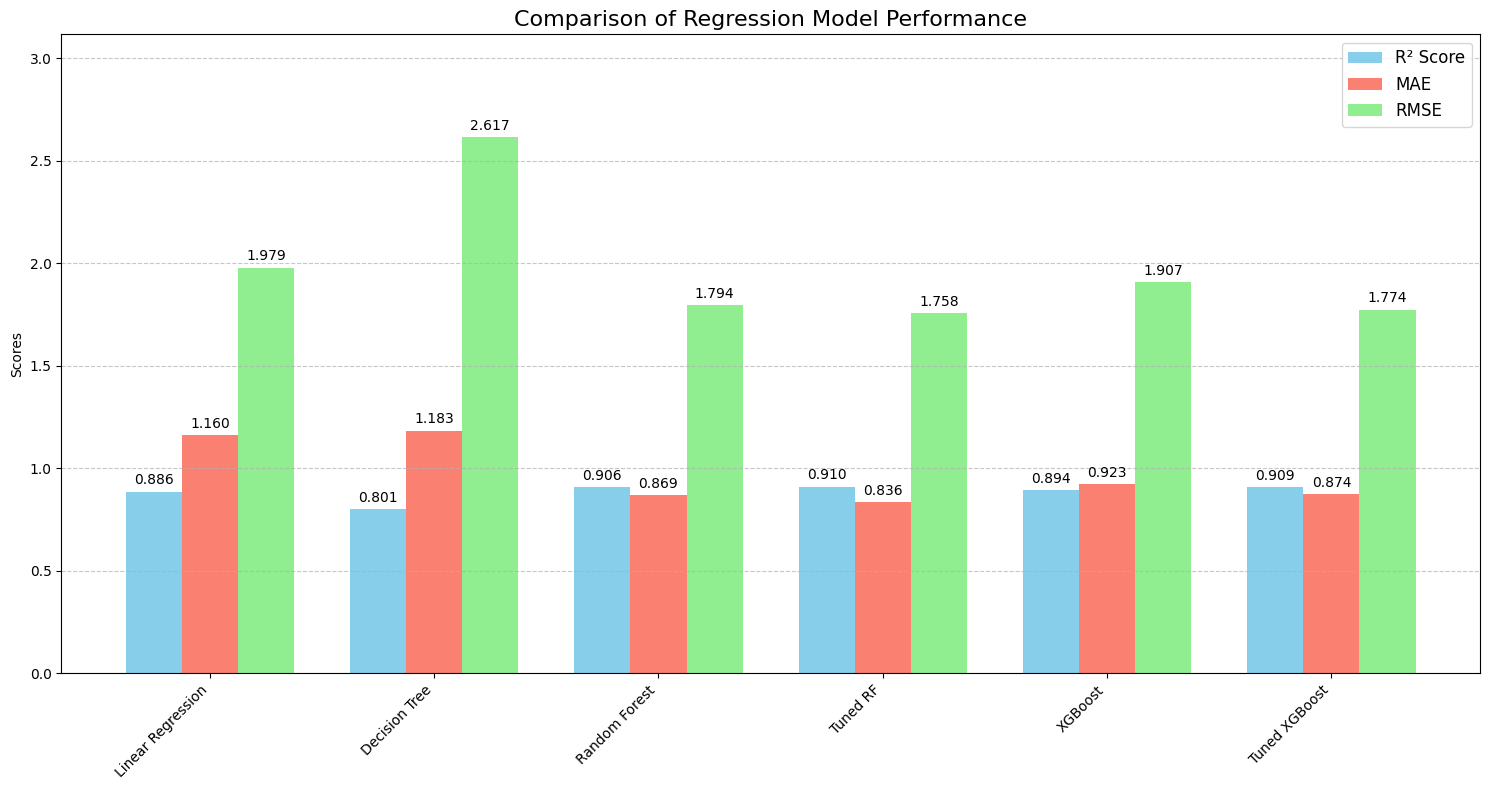


Plot saved as 'model_performance_comparison.png'


In [159]:

predictions = {
    'Linear Regression': y_pred_lr,       # Prediction from LinearRegression
    'Decision Tree': y_pred_dt,      # Prediction from DecisionTreeRegressor
    'Random Forest': y_pred_rf,        # Prediction from default RandomForestRegressor
    'Tuned RF': y_pred_best_rf,    # Prediction from the tuned RandomForest
    'XGBoost': y_pred_xgb,         # Prediction from default XGBoost
    'Tuned XGBoost': y_pred_best_xgb    # Prediction from the tuned XGBoost
}

results = []
for name, y_pred_values in predictions.items():
    r2 = r2_score(y_test, y_pred_values)
    mae = mean_absolute_error(y_test, y_pred_values)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_values))
    results.append({
        'Model': name,
        'R² Score': r2,
        'MAE': mae,
        'RMSE': rmse
    })

results_df = pd.DataFrame(results)
results_df = results_df.set_index('Model')

print("--- Model Performance Summary ---")
print(results_df)


fig, ax = plt.subplots(figsize=(15, 8))

# Define properties for the bars
models = results_df.index
x = np.arange(len(models))
width = 0.25

# Create the bars for each metric by pulling data from the DataFrame
rects1 = ax.bar(x - width, results_df['R² Score'], width, label='R² Score', color='skyblue')
rects2 = ax.bar(x, results_df['MAE'], width, label='MAE', color='salmon')
rects3 = ax.bar(x + width, results_df['RMSE'], width, label='RMSE', color='lightgreen')

# Add text for labels, title, and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Comparison of Regression Model Performance', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend(fontsize=12)

# Add labels on top of the bars
ax.bar_label(rects1, padding=3, fmt='%.3f')
ax.bar_label(rects2, padding=3, fmt='%.3f')
ax.bar_label(rects3, padding=3, fmt='%.3f')

fig.tight_layout()

plt.ylim(0, results_df['RMSE'].max() + 0.5) # Set y-axis limit dynamically
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Save the plot as an image
fig.savefig('model_performance_comparison.png')
print("\nPlot saved as 'model_performance_comparison.png'")



--- Model Performance Summary ---
                   R² Score       MAE      RMSE
Model                                          
Linear Regression  0.886244  1.160271  1.979080
Decision Tree      0.801076  1.183308  2.617097
Random Forest      0.906495  0.869068  1.794293
Tuned RF           0.910260  0.835606  1.757798
XGBoost            0.894355  0.922708  1.907221
Tuned XGBoost      0.908560  0.873670  1.774368


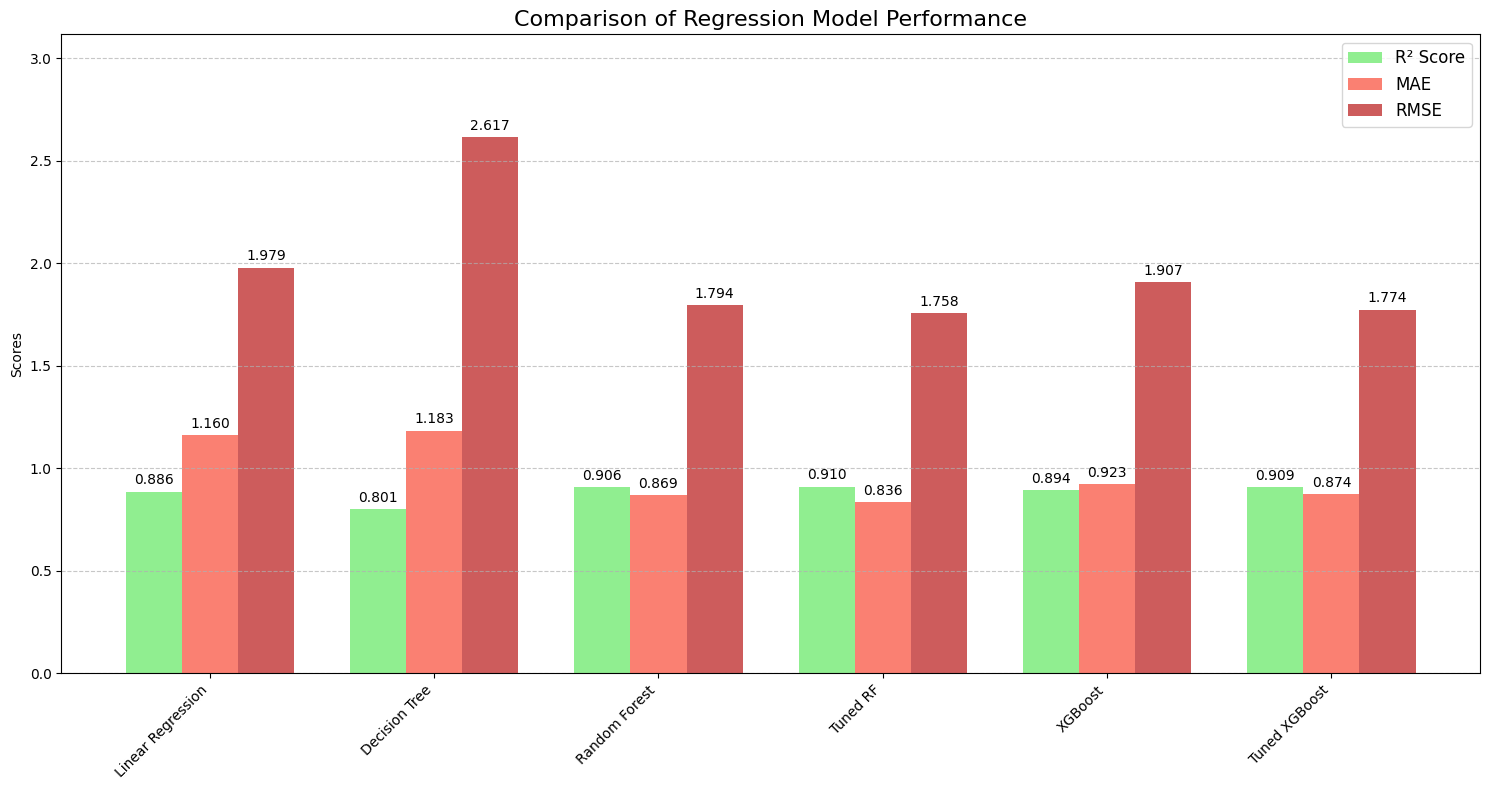


Plot saved as 'model_performance_comparison.png'


In [167]:



predictions = {
    'Linear Regression': y_pred_lr,       # Prediction from LinearRegression
    'Decision Tree': y_pred_dt,      # Prediction from DecisionTreeRegressor
    'Random Forest': y_pred_rf,        # Prediction from default RandomForestRegressor
    'Tuned RF': y_pred_best_rf,    # Prediction from the tuned RandomForest
    'XGBoost': y_pred_xgb,         # Prediction from default XGBoost
    'Tuned XGBoost': y_pred_best_xgb    # Prediction from the tuned XGBoost
}


# --- Step 2: Calculate scores for each model automatically ---
results = []
for name, y_pred_values in predictions.items():
    r2 = r2_score(y_test, y_pred_values)
    mae = mean_absolute_error(y_test, y_pred_values)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_values))
    results.append({
        'Model': name,
        'R² Score': r2,
        'MAE': mae,
        'RMSE': rmse
    })

# --- Step 3: Convert results to a DataFrame for easy plotting ---
results_df = pd.DataFrame(results)
results_df = results_df.set_index('Model')

print("--- Model Performance Summary ---")
print(results_df)


# --- Step 4: Plotting directly from the DataFrame with improved color scheme ---
fig, ax = plt.subplots(figsize=(15, 8))

# Define properties for the bars
models = results_df.index
x = np.arange(len(models))
width = 0.25

# Define new colors
# R² is higher is better (positive/neutral)
# MAE and RMSE are lower is better. We can use a single color for them,
# or a gradient, but let's choose distinct 'error' colors first.
color_r2 = 'steelblue'  # A strong positive color for R²
color_error_1 = 'darkorange' # A distinct color for MAE
color_error_2 = 'firebrick'  # A distinct color for RMSE (can also be a lighter/darker shade of error_1)


# Create the bars for each metric by pulling data from the DataFrame
rects1 = ax.bar(x - width, results_df['R² Score'], width, label='R² Score', color='lightgreen')
rects2 = ax.bar(x, results_df['MAE'], width, label='MAE', color='salmon')
rects3 = ax.bar(x + width, results_df['RMSE'], width, label='RMSE', color='indianred')

# Add text for labels, title, and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Comparison of Regression Model Performance', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend(fontsize=12)

# Add labels on top of the bars
ax.bar_label(rects1, padding=3, fmt='%.3f')
ax.bar_label(rects2, padding=3, fmt='%.3f')
ax.bar_label(rects3, padding=3, fmt='%.3f')

fig.tight_layout()

plt.ylim(0, results_df['RMSE'].max() + 0.5) # Set y-axis limit dynamically
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Save the plot as an image
fig.savefig('model_performance_comparison.png')
print("\nPlot saved as 'model_performance_comparison.png'")



In [168]:
import joblib



# 1. Save the tuned Random Forest model
model_filename = 'solar_prediction_model.pkl'
joblib.dump(best_rf_model, model_filename)

print(f"Model saved successfully as '{model_filename}'")

# 2. Save the scaler
scaler_filename = 'scaler.pkl'
joblib.dump(scaler, scaler_filename)

print(f"Scaler saved successfully as '{scaler_filename}'")


Model saved successfully as 'solar_prediction_model.pkl'
Scaler saved successfully as 'scaler.pkl'
